In [10]:
#Completed the analysis of what sorts of people were likely to survive.
#Extensively used packages such as pandas, numpy, matplotlib and seaborn
#Implemented the Random Forest classification method to predict which passengers survived the tragedy.
#Created visualizations such as factorplot, kdeplot, Facetgrid plot, lmplot in python.

import pandas as pd
from pandas import Series,DataFrame

In [11]:
titanic_data = pd.read_csv ('titanic.csv')

In [13]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

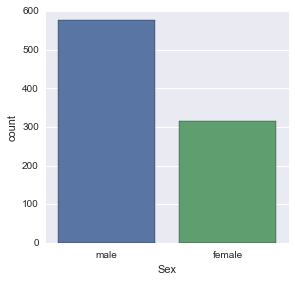

In [21]:
sns.factorplot('Sex',data=titanic_data,kind='count')

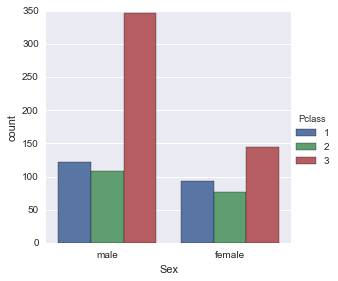

In [23]:
sns.factorplot('Sex',data=titanic_data,kind='count',hue='Pclass')

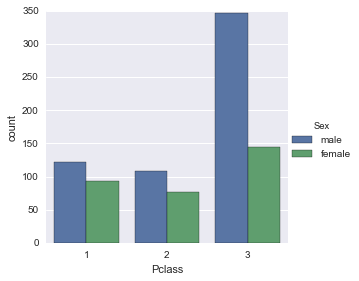

In [24]:
sns.factorplot('Pclass',data=titanic_data,kind='count',hue='Sex')

In [29]:
def male_female_child(passenger):
  age,sex = passenger

  if age<16:
    return 'child'
  else:
    return sex


In [30]:
titanic_data['Person']=titanic_data[['Age','Sex']].apply(male_female_child,axis=1)

In [31]:
titanic_data[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


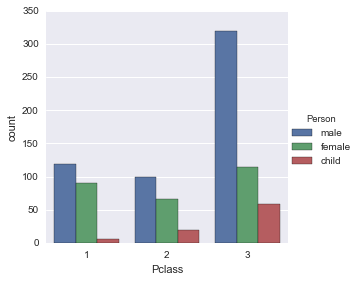

In [34]:
sns.factorplot('Pclass',data=titanic_data,kind='count',hue='Person')

In [35]:
titanic_data['Age'].mean()

29.69911764705882

In [36]:
titanic_data['Person'].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

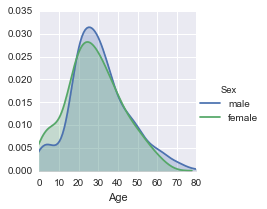

In [37]:
fig = sns.FacetGrid(titanic_data,hue='Sex',aspect=1)

fig.map(sns.kdeplot,'Age',shade=True)

oldest=titanic_data['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

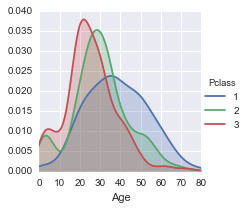

In [38]:
fig = sns.FacetGrid(titanic_data,hue='Pclass',aspect=1)

fig.map(sns.kdeplot,'Age',shade=True)

oldest=titanic_data['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

In [39]:
deck=titanic_data['Cabin'].dropna()

In [40]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

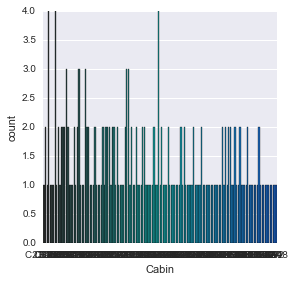

In [44]:
levels=[]

for level in deck:
    levels.append(level[0])
    
cabin_data=DataFrame(levels)
cabin_data.columns=['Cabin']
sns.factorplot('Cabin',data=titanic_data,kind='count',palette='winter_d')

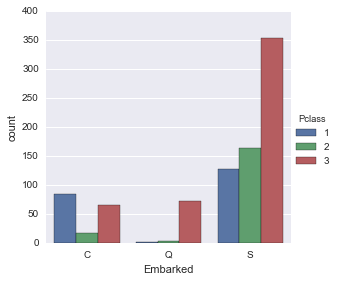

In [48]:
sns.factorplot('Embarked',data=titanic_data,kind='count',hue='Pclass',order=['C','Q','S'])

In [50]:
titanic_data['Alone'] = titanic_data.SibSp + titanic_data.Parch

In [51]:
titanic_data['Alone'].loc[titanic_data['Alone']>0] = 'With family'

titanic_data['Alone'].loc[titanic_data['Alone'] == 0] = 'Without family'

C:\Users\Prasad\Anaconda3\lib\site-packages\pandas\core\indexing.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [52]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Without family
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Without family


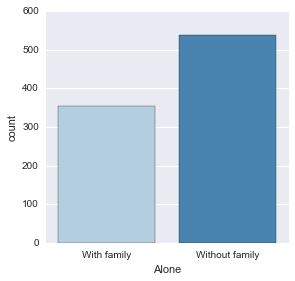

In [55]:
sns.factorplot('Alone',data=titanic_data,kind='count',palette='Blues')